In [ ]:
import keras as keras
import matplotlib.pyplot as plt
import numpy as np

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


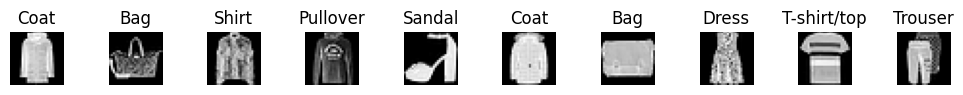

In [2]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.fashion_mnist.load_data()
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display a few random images
num_images = 10

ids = np.random.randint(0, xtrain.shape[0], size=num_images)

fig, ax = plt.subplots(1, num_images, figsize=(num_images, 1))

for i in range(num_images):
    ax[i].imshow(xtrain[ids[i]], cmap='gray')
    ax[i].set_title(labels[ytrain[ids[i]]])
    ax[i].axis('off')

plt.tight_layout()

In [3]:
xtrain = xtrain / 255
xtest = xtest / 255
# Reshape to (num_samples, width, height, channels)
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1)
ytrain = keras.utils.to_categorical(ytrain, 10)

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_33 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.7145 - loss: 0.7916 - val_accuracy: 0.8808 - val_loss: 0.3242
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8919 - loss: 0.2965 - val_accuracy: 0.8930 - val_loss: 0.2959
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.9045 - loss: 0.2618 - val_accuracy: 0.9016 - val_loss: 0.2656
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.9212 - loss: 0.2180 - val_accuracy: 0.9036 - val_loss: 0.2680
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.9252 - loss: 0.2002 - val_accuracy: 0.9046 - val_loss: 0.2645


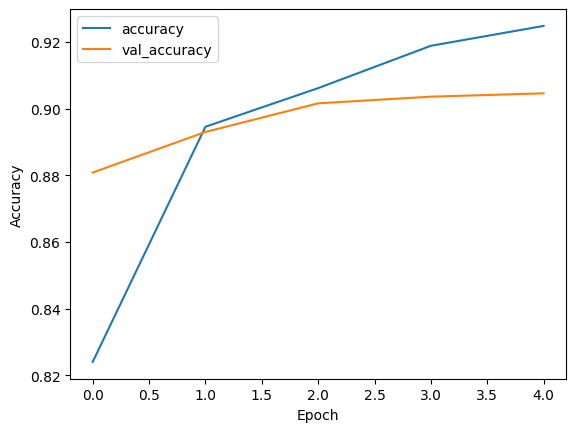

0.9045833349227905


In [9]:
def create_model(num_FC_units, alpha):
    """Creates a simple CNN 

    Params:
        num_FC_units: The number of units in the first fully connected layer
        alpha: The learning rate
    Returns:
        The model
    """

    model = keras.Sequential()

    model.add(keras.layers.InputLayer(shape=(xtrain.shape[1],
                                             xtrain.shape[2], 1)))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
                                  padding='same', activation='relu'))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                  padding='same', activation='relu'))
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=num_FC_units, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))

    # Compile the model
    # We want to change the learning rate, so we need to create a new optimizer
    optimizer = keras.optimizers.Adam(learning_rate=alpha)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return (model)


def get_model_accuracy(model, epochs=20, plot=True):
    """
    Trains the model

    Params:
        model: The model to train
        epochs: The number of epochs to train for (default 20)
        plot: Whether to plot the training history (default True)
    Returns:
        The accuracy of the model
    """

    history = model.fit(xtrain, ytrain,
                        batch_size=256,
                        epochs=epochs,
                        validation_split=0.2)

    if plot:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.legend(['accuracy', 'val_accuracy'])
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.show()

    return (history.history['val_accuracy'][-1])

# Test that everything is working
model = create_model(num_FC_units=100, alpha=0.01)
print(model.summary())
print(get_model_accuracy(model, epochs=5))

In [8]:
training_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
num_nodes = [pow(2, i) for i in range(5, 11)]
accuracies = np.zeros(shape=(len(training_rates), len(num_nodes)))

for i, t in enumerate(training_rates):
    for j, n in enumerate(num_nodes):
        print(f"Training CNN with alpha = {t} and {n} FC nodes")
        model = create_model(num_FC_units=n, alpha=t)
        accuracies[i, j] = get_model_accuracy(model, epochs=5, plot=False)

Training CNN with alpha = 1e-05 and 32 FC nodes
Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.3000 - loss: 2.2695 - val_accuracy: 0.3104 - val_loss: 2.1518
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.3277 - loss: 2.0906 - val_accuracy: 0.4442 - val_loss: 1.8665
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.4917 - loss: 1.7722 - val_accuracy: 0.6145 - val_loss: 1.4936
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.6362 - loss: 1.4148 - val_accuracy: 0.6774 - val_loss: 1.1880
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.6814 - loss: 1.1441 - val_accuracy: 0.7088 - val_loss: 0.9958
Training CNN with alpha = 1e-05 and 64 FC nodes
Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.2081 - loss: 2.2370 - val_accuracy: 0.4632 - val_loss: 2.0496
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5026 - loss: 1.9577 - val_accuracy: 0.5637 - val_loss: 1.6320
Epoch 3/

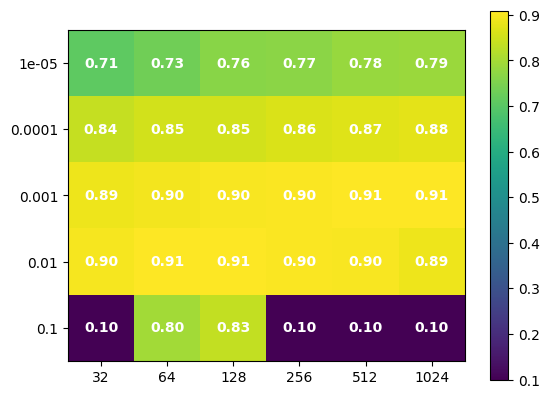

In [18]:
plt.imshow(accuracies)
plt.xticks(range(len(num_nodes)), labels=num_nodes)
plt.yticks(range(len(training_rates)), labels=training_rates)
for i in range(len(training_rates)):
    for j in range(len(num_nodes)):
            plt.text(j, i, f"{accuracies[i, j]:.2f}", 
                     ha='center', va='center', color='white', fontweight='bold')
plt.colorbar()
plt.show()